In [10]:
# pip install pyloudnorm
# pip install git+https://github.com/csteinmetz1/pyloudnorm
# pip install scipy
# pip install numpy 

import soundfile as sf
import pyloudnorm as pyln
import matplotlib.pyplot as plt

In [6]:
path = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/VocesAlamacenadas/VozCantada/VozEmma/VozEmma1.wav'
data, rate = sf.read(path) 

## Find the loudness of an audio file

It's easy to measure the loudness of a wav file. Here we use PySoundFile to read a .wav file as an ndarray.

In [8]:
meter = pyln.Meter(rate) # create BS.1770 meter
loudness = meter.integrated_loudness(data) # measure loudness
print(loudness)

-24.829681868554946


## Loudness normalize and peak normalize audio files

Methods are included to normalize audio files to desired peak values or desired loudness.

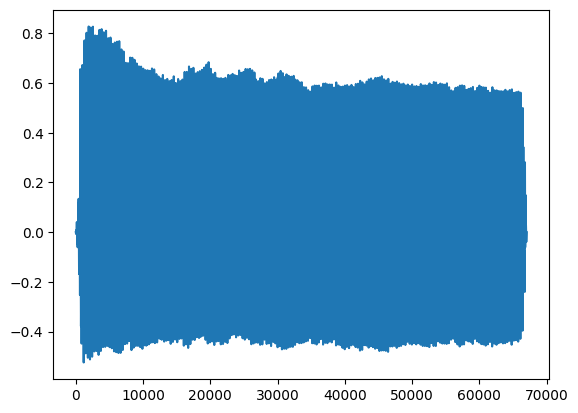

In [11]:
peak_normalized_audio = pyln.normalize.peak(data, -1.0)

# measure the loudness first 
meter = pyln.Meter(rate) # create BS.1770 meter
loudness = meter.integrated_loudness(data)

# loudness normalize audio to -12 dB LUFS
loudness_normalized_audio = pyln.normalize.loudness(data, loudness, -12.0)
plt.plot(loudness_normalized_audio)
plt.show()

## Advanced operation

A number of alternate weighting filters are available, as well as the ability to adjust the analysis block size. Examples are shown below.

In [12]:
from pyloudnorm import IIRfilter

meter1 = pyln.Meter(rate)                               # 400ms block size
meter2 = pyln.Meter(rate, block_size=0.200)             # 200ms block size

# filter classes
meter3 = pyln.Meter(rate)                               # BS.1770 meter
meter4 = pyln.Meter(rate, filter_class="DeMan")         # fully compliant filters  
meter5 = pyln.Meter(rate, filter_class="Fenton/Lee 1")  # low complexity improvement by Fenton and Lee
meter6 = pyln.Meter(rate, filter_class="Fenton/Lee 2")  # higher complexity improvement by Fenton and Lee
meter7 = pyln.Meter(rate, filter_class="Dash et al.")   # early modification option

# create your own IIR filters
my_high_pass  = IIRfilter(0.0, 0.5, 20.0, rate, 'high_pass')
my_high_shelf = IIRfilter(2.0, 0.7, 1525.0, rate, 'high_shelf')

# create a meter initialized without filters
meter8 = pyln.Meter(rate, filter_class="custom")

# load your filters into the meter
meter8._filters = {'my_high_pass' : my_high_pass, 'my_high_shelf' : my_high_shelf}